# **COMP_Pract_06(Fri 4pm)_Group B**

#Group Members

>Sadia Afreen Anannya |   **44483228**
>Md Safayatul Islam |   **44324049**
>Ahsan Adil Nibir |   **44397836**
>Anika Monjerin Otoshi |  **44522851**


# Summary 
Taxation is one of the most important sources that a government gets paid. Taxation is very important in order to make the economy and businesses grow as it helps to build bridges and roads, provide healthcare services for the citizens of the country and in order to get more and more foureing investments; education relies highly on these internal investment. Thus, we decided to work on this data. 
The goal of our project is to Analyze these data and provide better suggestions for the officials to understand what measures are required to maximize the taxation throughout the country.

# Goals
Our goals are to visualise how numbers of individuals with different interests in rental property are affected around different aspects, e.g. net range position, taxable income range, state/territory or age range etc.

Our goals are to visualise how numbers of individuals with different interests in rental property are affected around different aspects, e.g. net range position, taxable income range, state/territory or age range etc.

- A **regression** and **RFE analysis** and **correlation matrices** of variables such as Taxable income range, income year, age range, state/ territory, number of property interests etc. The distribution of these variables will be observed and the best factors will be selected for further analysis.

- **Trend or Time-Series analysis (ARIMA)** to determine the trend of different factors in a series of particular time period.

- **Heat maps** across the various territories throughout Australia from the dataset to determine the hottest areas (areas with most individuals and magnitude of their interest in rental properties) around the years.

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pylab as plt
from matplotlib.pyplot import imread
%matplotlib inline


In [133]:
#table_27c = df_c
dfc = pd.read_excel('table_27c.xlsx',skiprows=2,inplace=True)

In [134]:
dfc.head()

,Income year2,Number of property interests1,State or territory4,Number of individuals
0,2000,1 interest,ACT,18834
1,2000,1 interest,NSW,317052
2,2000,1 interest,NT,10991
3,2000,1 interest,QLD,177340
4,2000,1 interest,SA,58696


In [135]:
dfc['Number of property interests1'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [136]:
dfc.head()

,Income year2,Number of property interests1,State or territory4,Number of individuals
0,2000,1,ACT,18834
1,2000,1,NSW,317052
2,2000,1,NT,10991
3,2000,1,QLD,177340
4,2000,1,SA,58696


In [137]:
dfc['Number of property interests1'] = dfc['Number of property interests1'].astype(int)

In [138]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 4 columns):
Income year2                     978 non-null int64
Number of property interests1    978 non-null int32
State or territory4              978 non-null object
Number of individuals            978 non-null int64
dtypes: int32(1), int64(2), object(1)
memory usage: 26.9+ KB


In [139]:
dfc.describe()

,Income year2,Number of property interests1,Number of individuals
count,978.000000,978.000000,978.000000
mean,2008.552147,3.500000,30358.382413
std,5.217269,1.708699,74913.761680
min,2000.000000,1.000000,5.000000
25%,2004.000000,2.000000,780.000000
50%,2009.000000,3.500000,3397.500000
75%,2013.000000,5.000000,17520.250000
max,2017.000000,6.000000,495584.000000


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

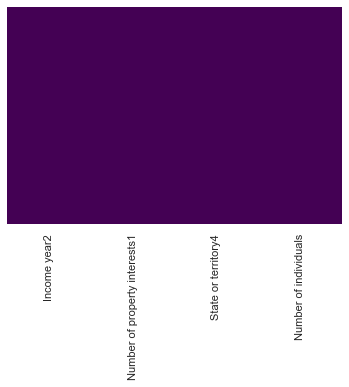

In [140]:
sns.heatmap(dfc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since No data is missing we can continue to further analysis

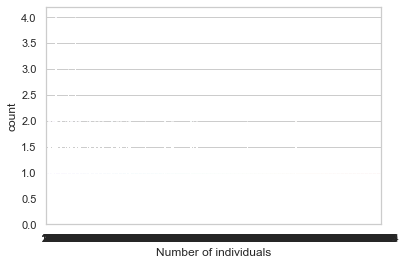

In [141]:
sns.set_style('whitegrid')
sns.countplot(x='Number of individuals',data=dfc,palette='rainbow')
sns.set(rc={'figure.figsize':(28,18.7)})

In [142]:
dfc.columns

Index(['Income year2', 'Number of property interests1', 'State or territory4',
       'Number of individuals'],
      dtype='object')

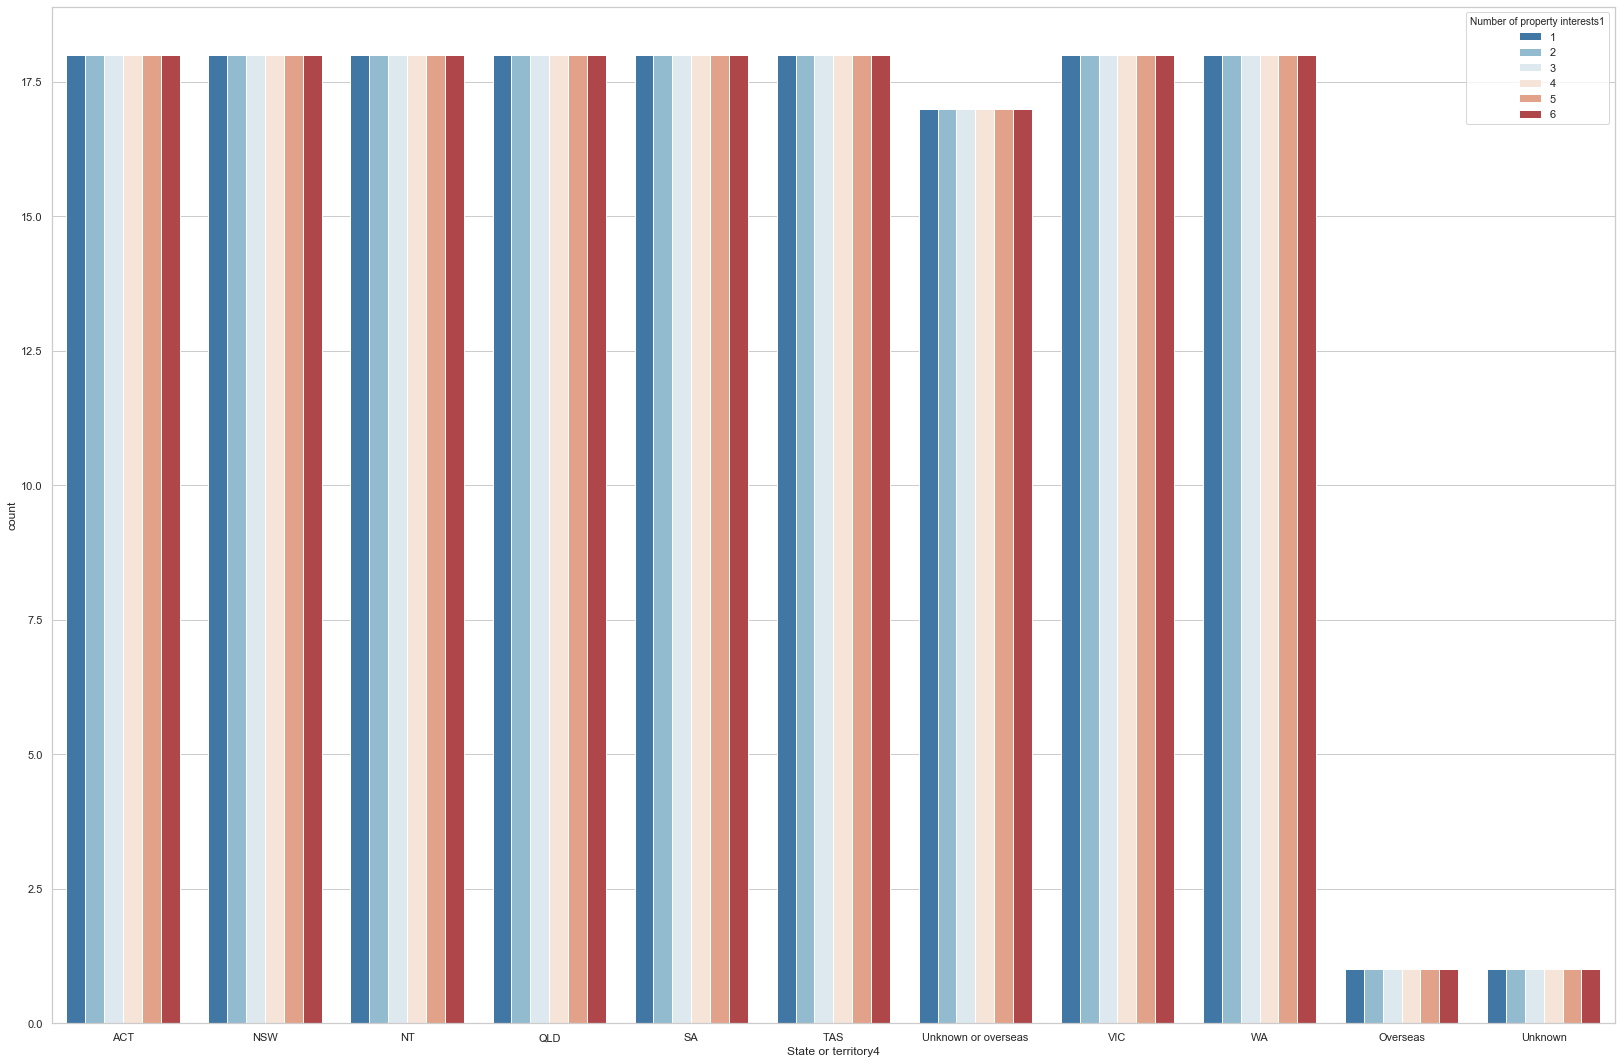

In [143]:
sns.set_style('whitegrid')
sns.countplot(x='State or territory4',hue='Number of property interests1',data=dfc,palette='RdBu_r')
sns.set(rc={'figure.figsize':(16,8)})

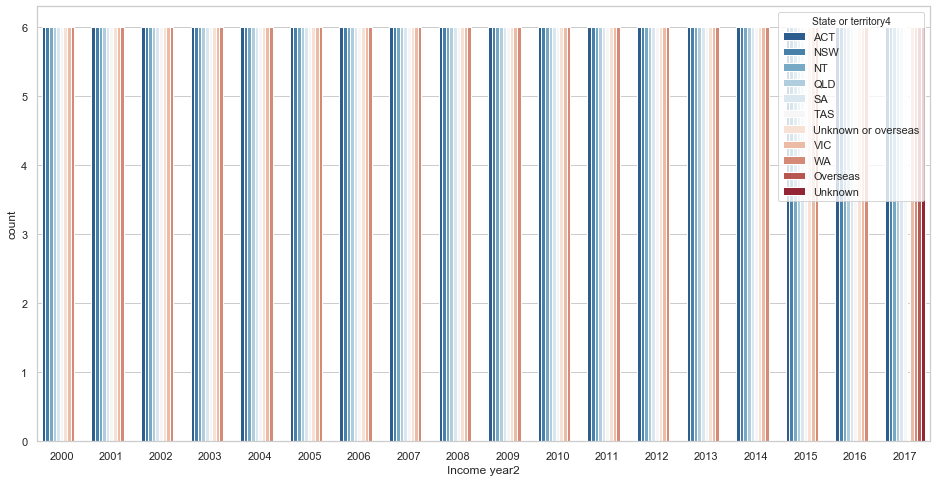

In [144]:
sns.set_style('whitegrid')
sns.countplot(x='Income year2',hue='State or territory4',data=dfc,palette='RdBu_r')
sns.set(rc={'figure.figsize':(16,8)})

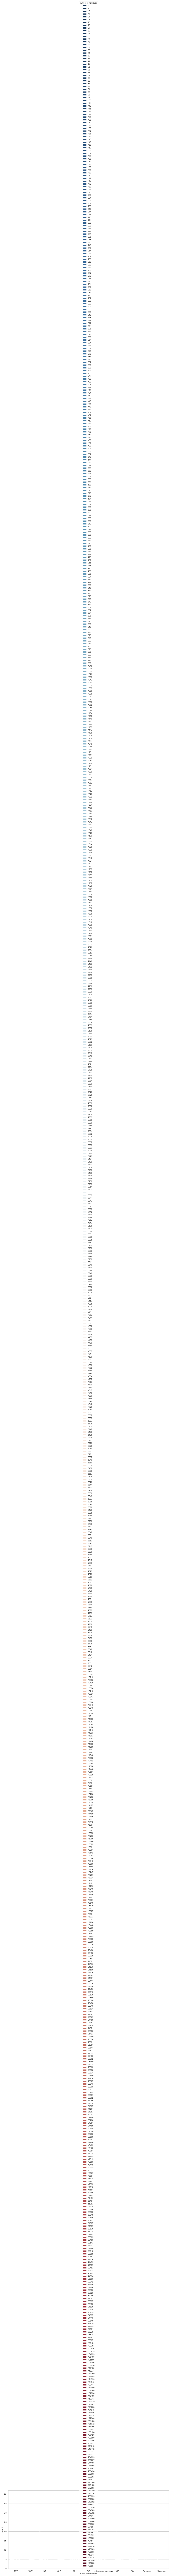

In [145]:
sns.set_style('whitegrid')
sns.countplot(x='State or territory4',hue='Number of individuals',data=dfc,palette='RdBu_r')
sns.set(rc={'figure.figsize':(16,8)})

In [146]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# is_string_dtype(dfc['Number of property interests1'])

# is_numeric_dtype(dfc['Number of property interests1'])

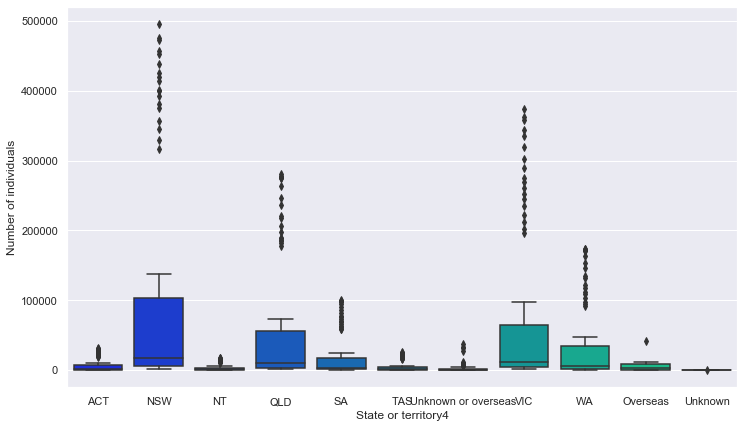

In [147]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='State or territory4',y='Number of individuals',data=dfc,palette='winter')
sns.set(rc={'figure.figsize':(22,14)})

In [148]:
dfc.columns

Index(['Income year2', 'Number of property interests1', 'State or territory4',
       'Number of individuals'],
      dtype='object')

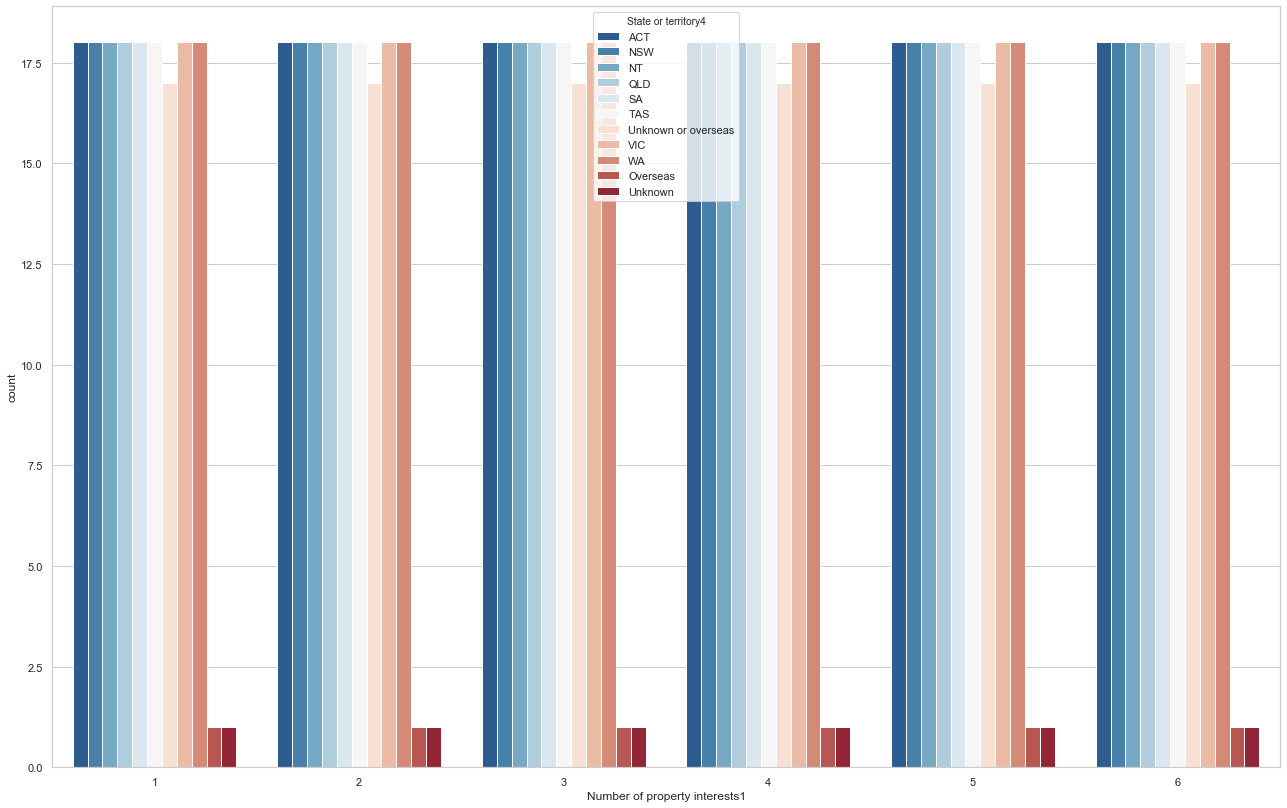

In [149]:
sns.set_style('whitegrid')
sns.countplot(x='Number of property interests1',hue='State or territory4',data=dfc,palette='RdBu_r')
sns.set(rc={'figure.figsize':(16,8)})

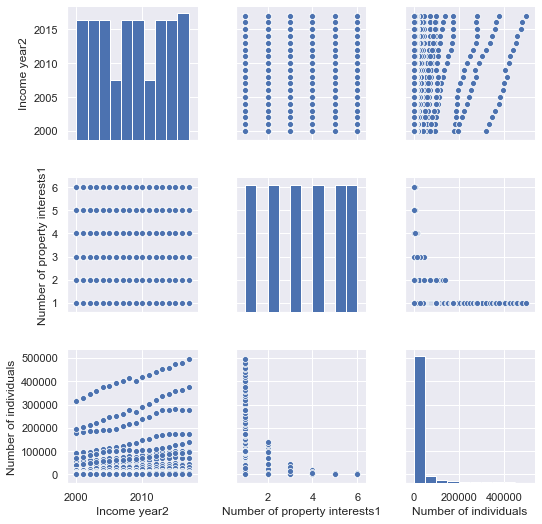

In [150]:
sns.pairplot(dfc)

In [151]:
dfc.head()

,Income year2,Number of property interests1,State or territory4,Number of individuals
0,2000,1,ACT,18834
1,2000,1,NSW,317052
2,2000,1,NT,10991
3,2000,1,QLD,177340
4,2000,1,SA,58696


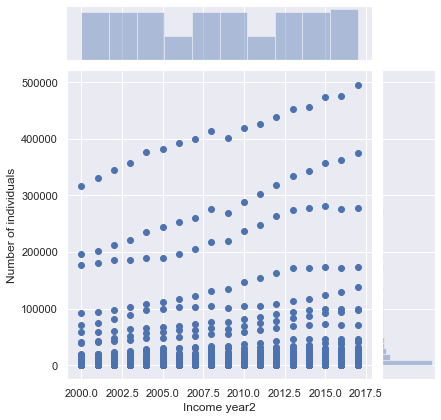

In [152]:
sns.jointplot(data=dfc, x='Income year2', y='Number of individuals')

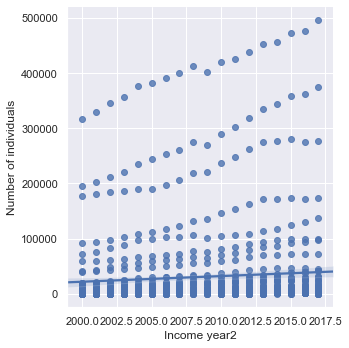

In [153]:
sns.lmplot(data=dfc,x='Income year2',y='Number of individuals')

In [156]:
dfc.head()

,Income year2,Number of property interests1,State or territory4,Number of individuals
0,2000,1,ACT,18834
1,2000,1,NSW,317052
2,2000,1,NT,10991
3,2000,1,QLD,177340
4,2000,1,SA,58696


## filtering by State

In [160]:
#filtering by State
dfc_act = dfc.loc[dfc['State or territory4'] == 'ACT']

##  State = ACT

In [161]:
dfc_act

,Income year2,Number of property interests1,State or territory4,Number of individuals
0,2000,1,ACT,18834
9,2000,2,ACT,4574
18,2000,3,ACT,1288
27,2000,4,ACT,406
36,2000,5,ACT,130
...,...,...,...,...
928,2017,2,ACT,9431
938,2017,3,ACT,3153
948,2017,4,ACT,1261
958,2017,5,ACT,570


In [257]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

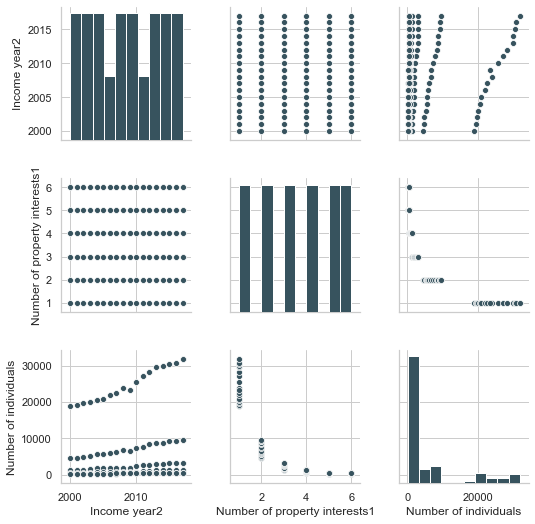

In [219]:
sns.pairplot(dfc_act)

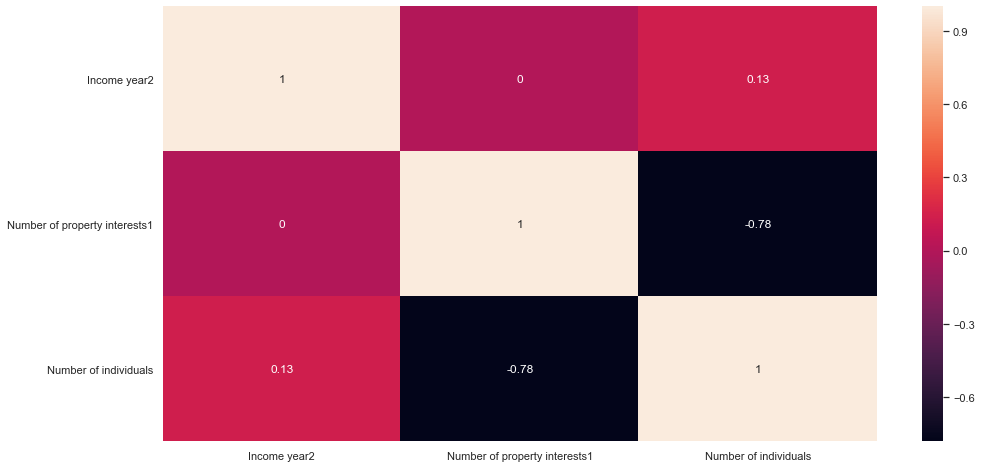

In [220]:
sns.heatmap(dfc_act.corr(), annot = True)

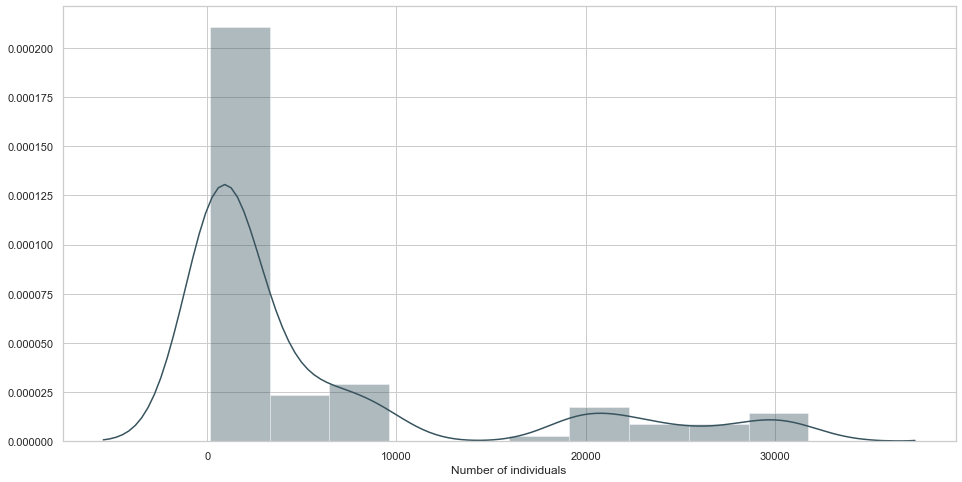

In [221]:
sns.distplot(dfc_act['Number of individuals'], bins=10)

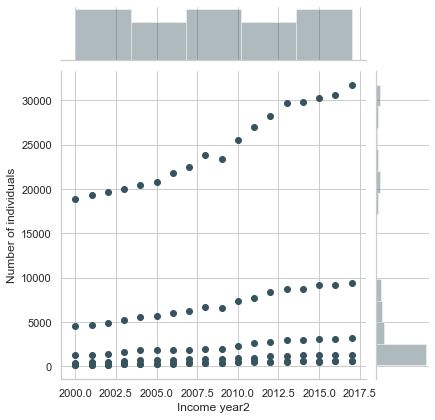

In [222]:
sns.jointplot(data=dfc_act, x='Income year2', y='Number of individuals')

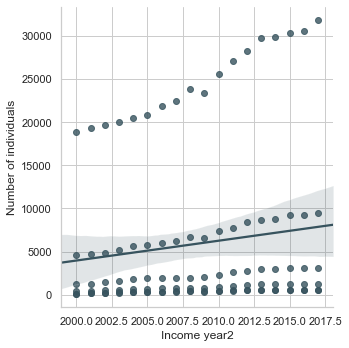

In [223]:
sns.lmplot(data=dfc_act, x='Income year2', y='Number of individuals')

In [229]:
dfc_act.head()

,Income year2,Number of property interests1,State or territory4,Number of individuals
0,2000,1,ACT,18834
9,2000,2,ACT,4574
18,2000,3,ACT,1288
27,2000,4,ACT,406
36,2000,5,ACT,130


## Liner Regression

In [243]:
X = dfc_act[['Income year2', 'Number of property interests1']]
y = dfc_act[['Number of individuals']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#creating and training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

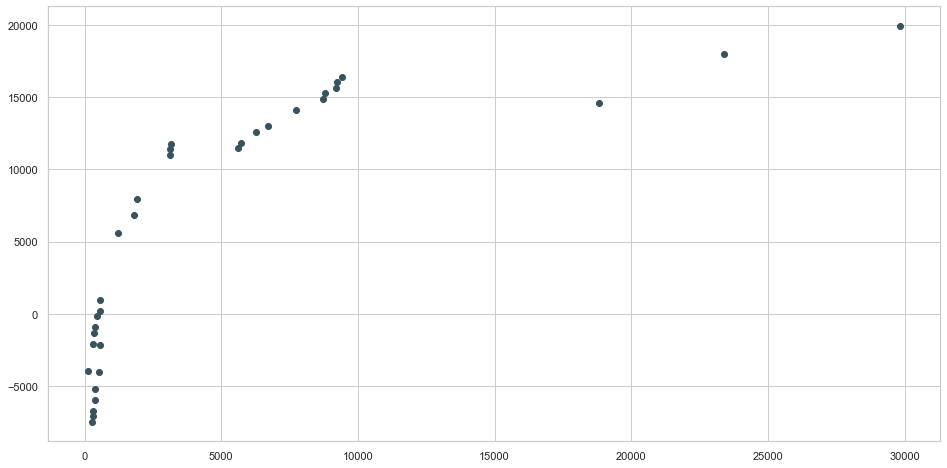

In [244]:
#prediction
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

In [245]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5331.410140503374
MSE: 34321964.169964164
RMSE: 5858.495043094614


# Selecting and analyzing who have number of property interst = 1 at ACT

In [187]:
#Selecting who have number of property interst = 1
dfc_act1 = dfc_act.loc[dfc_act['Number of property interests1'] == 1]

In [188]:
dfc_act1   

,Income year2,Number of property interests1,State or territory4,Number of individuals
0,2000,1,ACT,18834
54,2001,1,ACT,19294
108,2002,1,ACT,19689
162,2003,1,ACT,19969
216,2004,1,ACT,20480
270,2005,1,ACT,20851
324,2006,1,ACT,21847
378,2007,1,ACT,22473
432,2008,1,ACT,23821
486,2009,1,ACT,23388


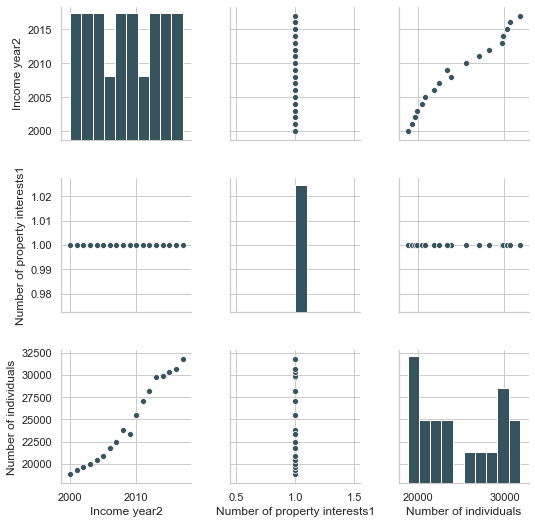

In [189]:
sns.pairplot(dfc_act1)

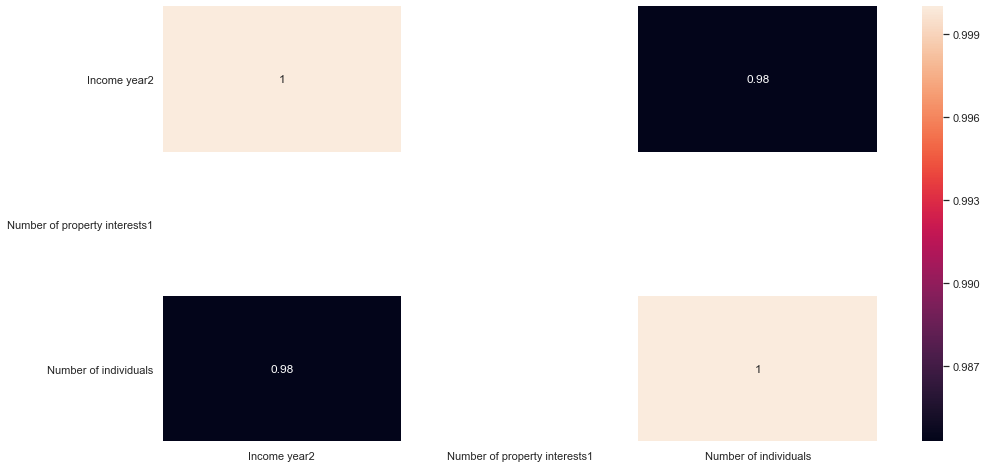

In [194]:
sns.heatmap(dfc_act1.corr(), annot = True)

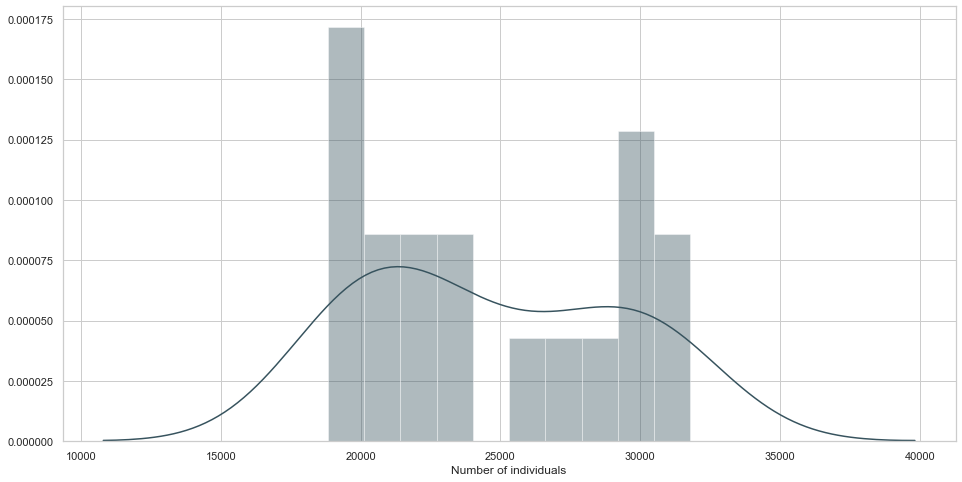

In [191]:
sns.distplot(dfc_act1['Number of individuals'], bins=10)

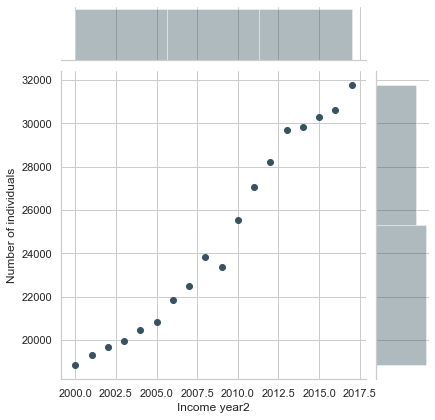

In [192]:
sns.jointplot(data=dfc_act1, x='Income year2', y='Number of individuals')

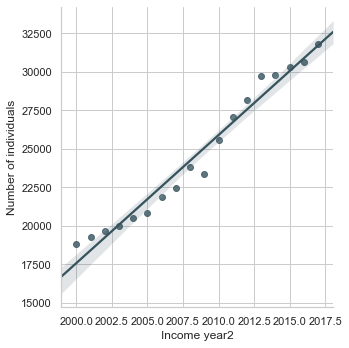

In [193]:
sns.lmplot(data=dfc_act1, x='Income year2', y='Number of individuals')

In [261]:
dfc_act1.head()

,Income year2,Number of property interests1,State or territory4,Number of individuals
0,2000,1,ACT,18834
54,2001,1,ACT,19294
108,2002,1,ACT,19689
162,2003,1,ACT,19969
216,2004,1,ACT,20480


In [260]:
#Saving dfc_act1 data frame as csv file to working with ARMA and ARIMA
dfc_act1.to_csv('act1.csv', encoding='utf-8', index=False)

# ARMA and ARIMA 

In [262]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

D:\Ana3\envs\tf_gpu4\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
D:\Ana3\envs\tf_gpu4\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [264]:
dfc_act1_a = pd.read_csv('act1.csv',index_col ='Income year2',parse_dates = True)
dfc_act1_a.index.freq = 'YS'

## ARMA

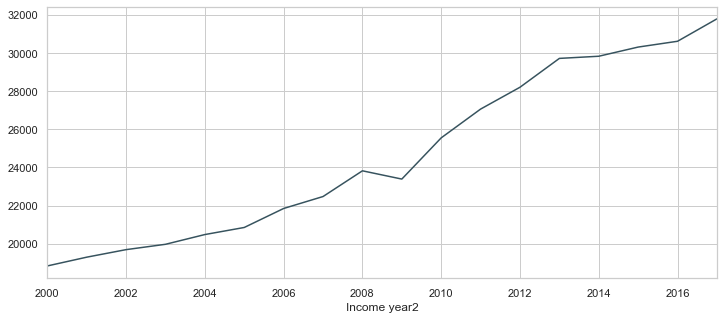

In [266]:
dfc_act1_a['Number of individuals'].plot(figsize=(12,5))

## Automate the augmented Dickey-Fuller Test
We'll be using it to determine if an incoming time series is stationary, let's write a function that performs the augmented Dickey-Fuller Test.

In [267]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

### Run the augmented Dickey-Fuller Test to confirm stationarity

In [268]:
adf_test(dfc_act1_a['Number of individuals'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.877450e+00
p-value                 1.345942e-14
# lags used             7.000000e+00
# observations          1.000000e+01
critical value (1%)    -4.331573e+00
critical value (5%)    -3.232950e+00
critical value (10%)   -2.748700e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Determine the (p,q) ARMA Orders using <tt>pmdarima.auto_arima</tt>


In [273]:
auto_arima(dfc_act1_a['Number of individuals'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   17
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -133.540
Method:                           css   S.D. of innovations            624.131
Date:                Wed, 30 Oct 2019   AIC                            271.080
Time:                        20:54:00   BIC                            272.747
Sample:                             1   HQIC                           271.246
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        761.9412    151.374      5.034      0.000     465.254    1058.629
==============================================================================
"""

In [281]:
# Set 4 years for testing (25 %) 
train = dfc_act1_a.iloc[:13]
test = dfc_act1_a.iloc[13:]

In [282]:
model = ARMA(train['Number of individuals'],order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARMA Model Results                               
=================================================================================
Dep. Variable:     Number of individuals   No. Observations:                   13
Model:                        ARMA(0, 1)   Log Likelihood                -117.336
Method:                          css-mle   S.D. of innovations           1931.512
Date:                   Wed, 30 Oct 2019   AIC                            240.672
Time:                           21:06:49   BIC                            242.366
Sample:                       01-01-2000   HQIC                           240.323
                            - 01-01-2012                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        2.256e+04    942.110     23.945      0.000    2.07e+04    2.44e+04
ma.L1.Number of individuals     0.8093      0.211      3.830      0.003       0.395       1.224
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2356           +0.0000j            1.2356            0.5000
-----------------------------------------------------------------------------
"""

### Obtain 3 years worth of predicted values

In [283]:
start=len(train)
end=len(train)+len(test)-1


In [284]:
predictions = results.predict(start, end).rename('ARMA(0,1) Predictions')

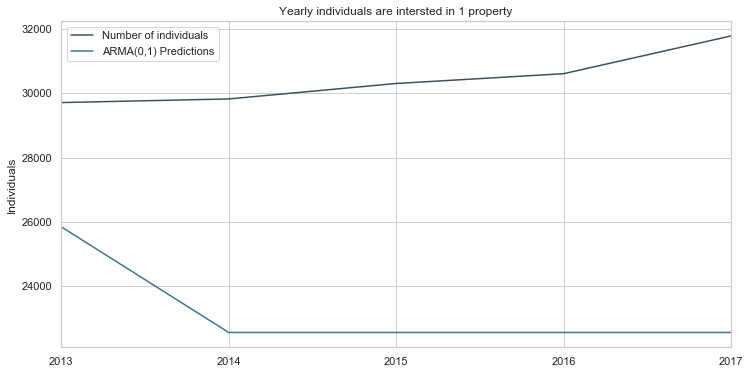

In [285]:
title = 'Yearly individuals are intersted in 1 property'
ylabel='Individuals'
xlabel='' # we don't really need a label here

ax = test['Number of individuals'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [196]:
dfc_act1.columns

Index(['Income year2', 'Number of property interests1', 'State or territory4',
       'Number of individuals'],
      dtype='object')

# Linear Regression
appliying linerar regression on the data(dfc_act1) to predict number of individuals in future years

In [230]:
X = dfc_act1[['Income year2', 'Number of property interests1']]

In [231]:
y = dfc_act1[['Number of individuals']]

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [234]:
#creating and training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation

In [235]:
lm.coef_.shape

(1, 2)

In [236]:
X.columns.shape

(2,)

In [237]:

# print the intercept
print(lm.intercept_)

[-1588095.88369419]


In [238]:
#cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])

In [239]:
lm.coef_

array([[803.01073002,   0.        ]])

### Prediction

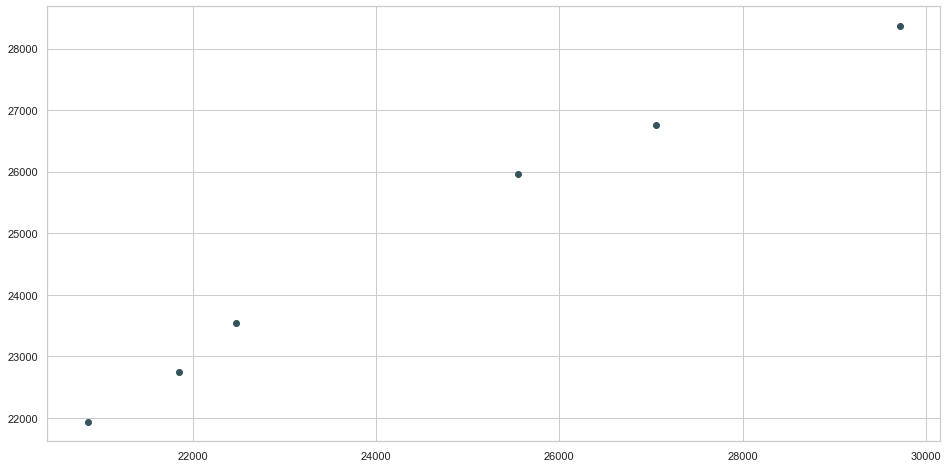

In [241]:
predictions = lm.predict(X_test);
plt.scatter(y_test,predictions);

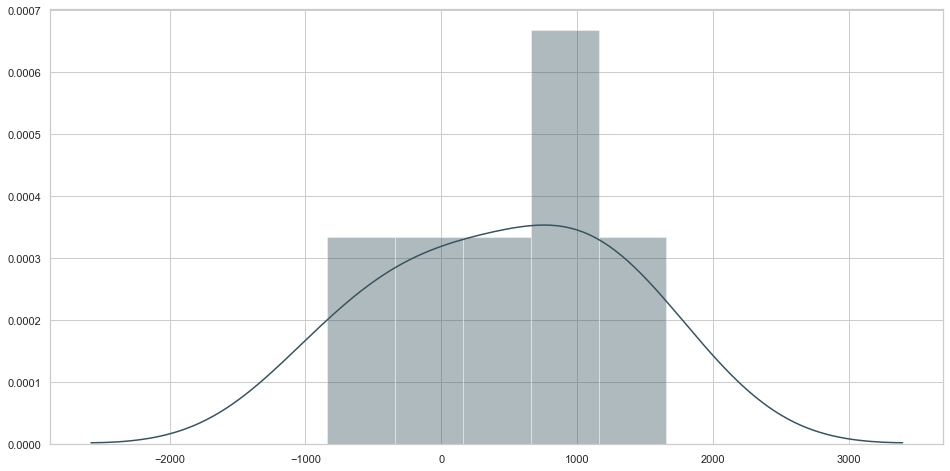

In [218]:
sns.distplot((y_test-predictions),bins=5);

In [217]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 794.9894736841865
MSE: 890883.9927584341
RMSE: 943.8665121501208


# Anayzing individuals in All state who has property interest = 1

In [247]:
dfc.columns

Index(['Income year2', 'Number of property interests1', 'State or territory4',
       'Number of individuals'],
      dtype='object')

In [248]:
#filtering by interest 
dfc_int1 = dfc.loc[dfc['Number of property interests1'] == 1]

In [250]:
dfc_int1.head()

,Income year2,Number of property interests1,State or territory4,Number of individuals
0,2000,1,ACT,18834
1,2000,1,NSW,317052
2,2000,1,NT,10991
3,2000,1,QLD,177340
4,2000,1,SA,58696


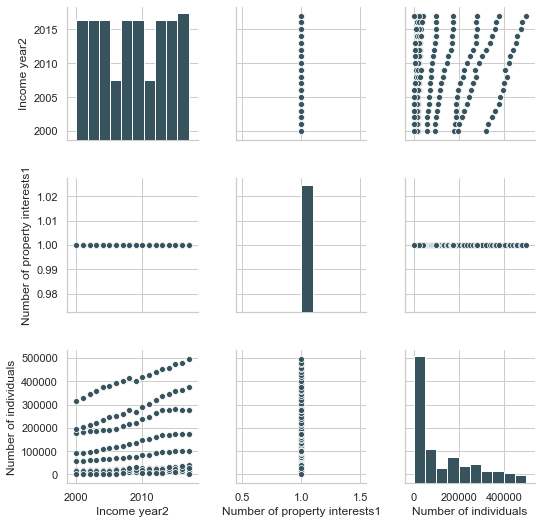

In [258]:
sns.pairplot(dfc_int1)